This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 784)

In [3]:
(len(train_images), 784)

(60000, 784)

In [5]:
train_images_with_noise_channels.shape

(60000, 1568)

In [6]:
train_labels.shape

(60000,)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 7ms/step - loss: 0.6138 - accuracy: 0.8120 - val_loss: 0.2659 - val_accuracy: 0.9207
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2483 - accuracy: 0.9228 - val_loss: 0.2031 - val_accuracy: 0.9402
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1607 - accuracy: 0.9503 - val_loss: 0.1532 - val_accuracy: 0.9548
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1149 - accuracy: 0.9650 - val_loss: 0.1688 - val_accuracy: 0.9467
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0839 - accuracy: 0.9736 - val_loss: 0.1368 - val_accuracy: 0.9591
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0626 - accuracy: 0.9807 - val_loss: 0.1117 - val_accuracy: 0.9691
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.1385 - val_accuracy: 0.9612
Epoch 

In [8]:
model = get_model()  ## 노이즈 없이 실행
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2866 - accuracy: 0.9182 - val_loss: 0.1528 - val_accuracy: 0.9557
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1178 - accuracy: 0.9653 - val_loss: 0.1057 - val_accuracy: 0.9680
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0774 - accuracy: 0.9771 - val_loss: 0.0951 - val_accuracy: 0.9725
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0550 - accuracy: 0.9835 - val_loss: 0.0917 - val_accuracy: 0.9751
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0410 - accuracy: 0.9879 - val_loss: 0.0880 - val_accuracy: 0.9747
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0304 - accuracy: 0.9912 - val_loss: 0.0795 - val_accuracy: 0.9776
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0232 - accuracy: 0.9932 - val_loss: 0.0803 - val_accuracy: 0.9785
Epoch 

**Plotting a validation accuracy comparison**

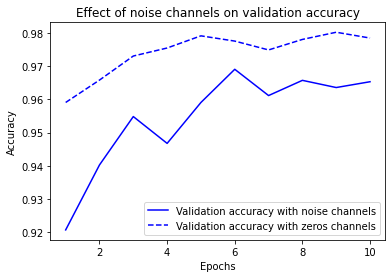

In [9]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

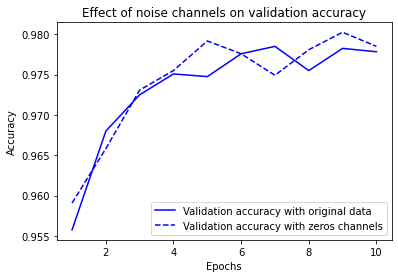

In [10]:
val_acc1 = history.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc1, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) ## shuffle 해줌.

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3169 - accuracy: 0.1032 - val_loss: 2.3061 - val_accuracy: 0.1073
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2994 - accuracy: 0.1181 - val_loss: 2.3121 - val_accuracy: 0.1077
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2888 - accuracy: 0.1292 - val_loss: 2.3174 - val_accuracy: 0.1036
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2760 - accuracy: 0.1409 - val_loss: 2.3244 - val_accuracy: 0.1030
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2576 - accuracy: 0.1546 - val_loss: 2.3361 - val_accuracy: 0.1019
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2362 - accuracy: 0.1688 - val_loss: 2.3505 - val_accuracy: 0.1016
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2129 - accuracy: 0.1839 - val_loss: 2.3631 - val_accuracy: 0.1028

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), ## learning rate(학습률)이 엄청 높기에 정확도가 늘지 않는다.
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 850.0004 - accuracy: 0.4654 - val_loss: 3.5684 - val_accuracy: 0.3418
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 5.5531 - accuracy: 0.3091 - val_loss: 2.5869 - val_accuracy: 0.2918
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 3.0512 - accuracy: 0.2904 - val_loss: 2.7293 - val_accuracy: 0.2505
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.6945 - accuracy: 0.2820 - val_loss: 2.1807 - val_accuracy: 0.2934
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6468 - accuracy: 0.2771 - val_loss: 2.1857 - val_accuracy: 0.2742
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6746 - accuracy: 0.2721 - val_loss: 2.2209 - val_accuracy: 0.2395
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5386 - accuracy: 0.2562 - val_loss: 2.3781 - val_accuracy: 0.2823
Epoc

**The same model with a more appropriate learning rate**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4022 - accuracy: 0.9072 - val_loss: 0.2042 - val_accuracy: 0.9448
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1443 - accuracy: 0.9626 - val_loss: 0.1687 - val_accuracy: 0.9621
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1132 - accuracy: 0.9730 - val_loss: 0.1807 - val_accuracy: 0.9658
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0993 - accuracy: 0.9775 - val_loss: 0.1996 - val_accuracy: 0.9689
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0915 - accuracy: 0.9812 - val_loss: 0.2120 - val_accuracy: 0.9701
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0849 - accuracy: 0.9835 - val_loss: 0.2513 - val_accuracy: 0.9665
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0729 - accuracy: 0.9851 - val_loss: 0.2399 - val_accuracy: 0.9706
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [15]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) ## softmax를 활용한 한 개의 layer 설정하는 것이 로지스틱 회귀분석.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6690 - accuracy: 0.8346 - val_loss: 0.3585 - val_accuracy: 0.9032
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3512 - accuracy: 0.9040 - val_loss: 0.3070 - val_accuracy: 0.9164
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3156 - accuracy: 0.9122 - val_loss: 0.2903 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2994 - accuracy: 0.9163 - val_loss: 0.2814 - val_accuracy: 0.9222
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2897 - accuracy: 0.9192 - val_loss: 0.2760 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2830 - accuracy: 0.9205 - val_loss: 0.2719 - val_accuracy: 0.9251
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2777 - accuracy: 0.9224 - val_loss: 0.2709 - val_accuracy: 0.9254
Epoch 

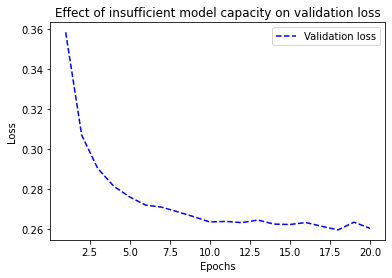

In [16]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [17]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3692 - accuracy: 0.8955 - val_loss: 0.2082 - val_accuracy: 0.9392
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1667 - accuracy: 0.9516 - val_loss: 0.1380 - val_accuracy: 0.9617
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1159 - accuracy: 0.9654 - val_loss: 0.1190 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0885 - accuracy: 0.9739 - val_loss: 0.1055 - val_accuracy: 0.9681
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0705 - accuracy: 0.9795 - val_loss: 0.1024 - val_accuracy: 0.9706
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0585 - accuracy: 0.9817 - val_loss: 0.0949 - val_accuracy: 0.9720
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0491 - accuracy: 0.9852 - val_loss: 0.0962 - val_accuracy: 0.9718
Epoch 

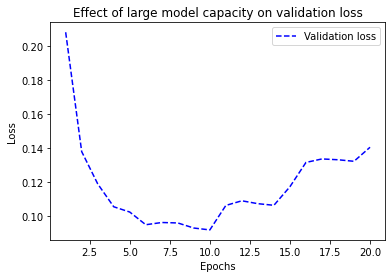

In [18]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of large model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [19]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 40ms/step - loss: 0.5753 - accuracy: 0.7495 - val_loss: 0.4507 - val_accuracy: 0.8645
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3648 - accuracy: 0.8921 - val_loss: 0.3409 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2601 - accuracy: 0.9193 - val_loss: 0.2889 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2028 - accuracy: 0.9346 - val_loss: 0.2928 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1639 - accuracy: 0.9473 - val_loss: 0.3000 - val_accuracy: 0.8780
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1375 - accuracy: 0.9572 - val_loss: 0.2795 - val_accuracy: 0.8895
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1154 - accurac

**Version of the model with lower capacity**

In [21]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5809 - accuracy: 0.7683 - val_loss: 0.4934 - val_accuracy: 0.8406
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4289 - accuracy: 0.8785 - val_loss: 0.4027 - val_accuracy: 0.8708
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3408 - accuracy: 0.9027 - val_loss: 0.3452 - val_accuracy: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2816 - accuracy: 0.9168 - val_loss: 0.3140 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2377 - accuracy: 0.9271 - val_loss: 0.2976 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2003 - accuracy: 0.9389 - val_loss: 0.2909 - val_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1749 - accuracy: 0.9481 - val_loss: 0.2726 - val_accuracy: 0.8938
Epoch 8/20
30

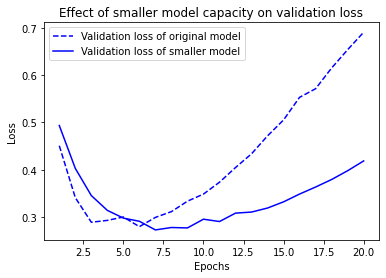

In [22]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with higher capacity**

In [23]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5305 - accuracy: 0.7719 - val_loss: 0.3503 - val_accuracy: 0.8483
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2512 - accuracy: 0.9022 - val_loss: 0.3322 - val_accuracy: 0.8559
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1491 - accuracy: 0.9436 - val_loss: 0.3197 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0684 - accuracy: 0.9777 - val_loss: 0.3993 - val_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1078 - accuracy: 0.9770 - val_loss: 0.3412 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0060 - accuracy: 0.9995 - val_loss: 0.5198 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 8.4580e-04 - accuracy: 1.0000 - val_loss: 0.6181 - val_accuracy: 0.8854
Epoch 8/2

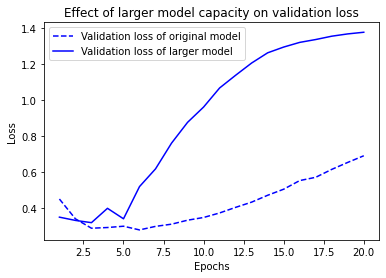

In [24]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [25]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5857 - accuracy: 0.7705 - val_loss: 0.4442 - val_accuracy: 0.8744
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3855 - accuracy: 0.8979 - val_loss: 0.3803 - val_accuracy: 0.8907
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3260 - accuracy: 0.9171 - val_loss: 0.3733 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2921 - accuracy: 0.9297 - val_loss: 0.4286 - val_accuracy: 0.8515
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2774 - accuracy: 0.9331 - val_loss: 0.3792 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2634 - accuracy: 0.9369 - val_loss: 0.4036 - val_accuracy: 0.8687
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2548 - accuracy: 0.9428 - val_loss: 0.3712 - val_accuracy: 0.8827
Epoch 8/20
30

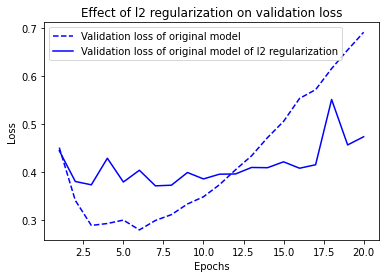

In [29]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model of l2 regularization")
plt.title("Effect of l2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Different weight regularizers available in Keras**

In [27]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6303 - accuracy: 0.6335 - val_loss: 0.5100 - val_accuracy: 0.8444
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5031 - accuracy: 0.7685 - val_loss: 0.4012 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4222 - accuracy: 0.8293 - val_loss: 0.3519 - val_accuracy: 0.8704
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3610 - accuracy: 0.8645 - val_loss: 0.2964 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3104 - accuracy: 0.8905 - val_loss: 0.2780 - val_accuracy: 0.8919
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2677 - accuracy: 0.9059 - val_loss: 0.2755 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2378 - accuracy: 0.9203 - val_loss: 0.2753 - val_accuracy: 0.8927
Epoch 8/20
30

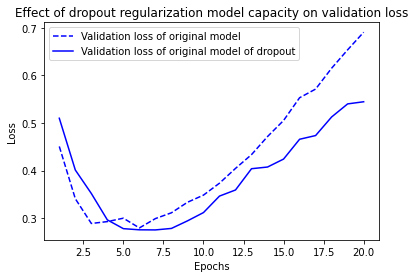

In [30]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss2, "b-",
         label="Validation loss of original model of dropout")
plt.title("Effect of dropout regularization model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary